# Traffic Prediction using Naive Bayes Algorithm

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix
from sklearn.naive_bayes import GaussianNB

import warnings

# Disable warnings
warnings.filterwarnings("ignore")

## Importing the Dataset and Describing it

In [2]:
dataset = pd.read_csv('datasets/Traffic.csv')
dataset.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [3]:
dataset.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [4]:
dataset = dataset.drop('Date', axis=1)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Day of the week    2976 non-null   object
 2   CarCount           2976 non-null   int64 
 3   BikeCount          2976 non-null   int64 
 4   BusCount           2976 non-null   int64 
 5   TruckCount         2976 non-null   int64 
 6   Total              2976 non-null   int64 
 7   Traffic Situation  2976 non-null   object
dtypes: int64(5), object(3)
memory usage: 186.1+ KB


In [6]:
dataset.isna().sum()

Time                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

There is no null values

## Visualizing the Data

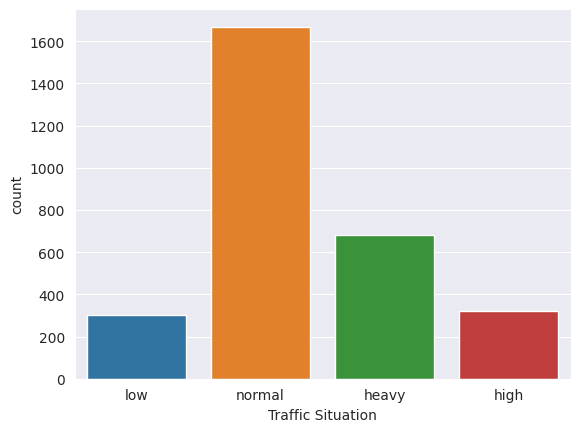

In [7]:
# Showing labels count
sns.countplot(dataset, x='Traffic Situation')
plt.show()

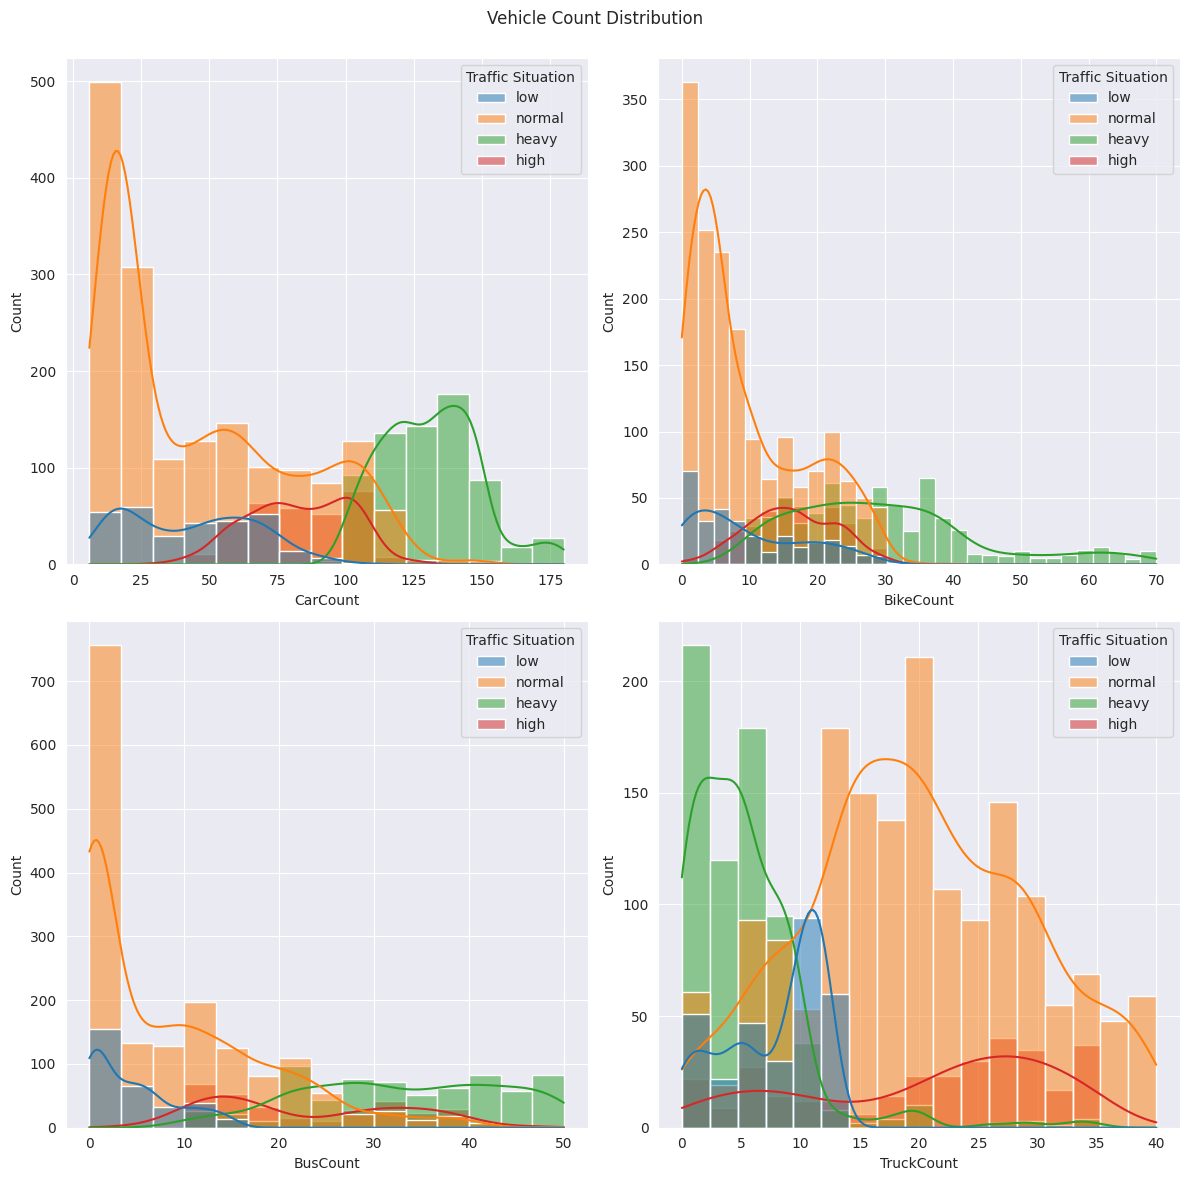

In [8]:
# Distribution of 'CarCount', 'BikeCount', 'BusCount' and 'TruckCount' against Traffic Situation
vehicleColumn = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.ravel()

for i in range(4):
    sns.histplot(dataset, x=vehicleColumn[i], hue='Traffic Situation', kde=True, ax=axes[i])

fig.suptitle('Vehicle Count Distribution')
fig.tight_layout()
fig.subplots_adjust(top=0.94)
fig.show()

In [9]:
# Separate 'Time' column into 'Time' and 'Midday'
for i in range(len(dataset['Time'])):    
    dataset.loc[i, 'Midday'] = str(dataset.loc[i, 'Time'][-2:])

dataset['Time'] = dataset['Time'].str[:-2]

In [10]:
# Change Time column from (Hour:Minute:second) format to seconds
dataset['Time'] = pd.to_datetime(dataset['Time']).dt.hour * 3600 + \
                    pd.to_datetime(dataset['Time']).dt.minute * 60 + \
                    pd.to_datetime(dataset['Time']).dt.second

In [11]:
dataset.tail()

,Time,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Midday
2971,38700,Thursday,16,3,1,36,56,normal,PM
2972,39600,Thursday,11,0,1,30,42,normal,PM
2973,40500,Thursday,15,4,1,25,45,normal,PM
2974,41400,Thursday,16,5,0,27,48,normal,PM
2975,42300,Thursday,14,3,1,15,33,normal,PM


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   int32 
 1   Day of the week    2976 non-null   object
 2   CarCount           2976 non-null   int64 
 3   BikeCount          2976 non-null   int64 
 4   BusCount           2976 non-null   int64 
 5   TruckCount         2976 non-null   int64 
 6   Total              2976 non-null   int64 
 7   Traffic Situation  2976 non-null   object
 8   Midday             2976 non-null   object
dtypes: int32(1), int64(5), object(3)
memory usage: 197.8+ KB


## Training and Testing with GaussianNB

In [13]:
X = dataset[['Time', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']]
y = dataset['Traffic Situation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2380, 6), (596, 6), (2380,), (596,))

In [14]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [15]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8104026845637584


## GaussianNB and BernoulliNB

In [16]:
class NaiveBayes():
    def __init__(self):
        self.model = {}
        self.columns = []
        self.num_columns = []
        self.cat_columns = []
        self.labels = []
        self.label_column = None

    def fit(self, data, label_column):
        self.columns = data.drop(label_column, axis=1).columns
        self.labels = data[label_column].unique().tolist()
        self.label_column = label_column
        
        label = {}
        label_grouped = data.groupby(label_column)
        for name, val in label_grouped:
            bayes = val.shape[0] / data.shape[0]
            label[name] = bayes
        self.model[label_column] = label
        
        for column in self.columns:
            
            if data[column].dtype == object:
                self.cat_columns.append(column)
                feature_cross = pd.crosstab(data[column], data[label_column], margins=True).unstack().reorder_levels((column, label_column))
                feature_categories = data[column].unique()
                column_bayes = {}
                for category in feature_categories:
                    category_bayes = {}
                    for label in self.labels:
                        bayes = float(feature_cross.loc[category, label] / feature_cross.loc['All', label])
                        category_bayes[label] = bayes
                    column_bayes[category] = category_bayes
                self.model[column] = column_bayes
            
            elif data[column].dtype == int or data[column].dtype == float:
                self.num_columns.append(column)
                column_bayes = {}
                for label in self.labels:
                    feature_per_label = data[data[label_column] == label][column]
                    mean = feature_per_label.mean()
                    std = feature_per_label.std()
                    column_bayes[label] = {'mean': mean, 'std': std}
                self.model[column] = column_bayes
    
    def predict(self, data):
        predictions = []
        true_labels = []
        
        for i in data.index:
            row = data.loc[i]
            pred = ''
            likelihood = 0
            
            for label in self.labels:
                bayes = 1
                for col in self.cat_columns:
                    bayes *= self.model[col][row[col]][label]
                for col in self.num_columns:
                    x = row[col]
                    mu = self.model[col][label]['mean']
                    sigma = self.model[col][label]['std']
                    sigma2 = np.power(sigma, 2)
                    gp = self.gaussian_prob(x, mu, sigma2)
                    bayes *= gp
                bayes *= self.model[self.label_column][label]
                if bayes > likelihood:
                    pred = label
                    likelihood = bayes
            predictions.append(pred)
            true_labels.append(row[self.label_column])
            
        return predictions, true_labels
    
    @staticmethod
    def gaussian_prob(x, mu, sigma2):
        a = (1 / np.sqrt(2 * np.pi * sigma2))
        b = np.exp(-np.square(x - mu) / (2 * sigma2))
        return a * b

## Training with all data

In [17]:
train_data, test_data = train_test_split(dataset, test_size=0.2, stratify=dataset['Traffic Situation'], random_state=42)

In [18]:
nb = NaiveBayes()
nb.fit(train_data, 'Traffic Situation')

In [19]:
predictions, true_labels = nb.predict(test_data)

In [20]:
acc = accuracy_score(true_labels, predictions)
print(f"Accuracy: {acc}")

Accuracy: 0.8187919463087249


## Training with 150 data

In [21]:
reduced_data, _ = train_test_split(dataset, train_size=150, stratify=dataset['Traffic Situation'], random_state=42)
train_data_reduced, test_data_reduced = train_test_split(reduced_data, test_size=0.2, stratify=reduced_data['Traffic Situation'], random_state=42)

# Export train data and test data to calculate manually
train_data_reduced.to_excel('datasets/train_data.xlsx', index=False)
test_data_reduced.to_excel('datasets/test_data.xlsx', index=False)

In [22]:
nb_reduced = NaiveBayes()
nb_reduced.fit(train_data_reduced, 'Traffic Situation')

In [23]:
predictions_reduced, true_labels_reduced = nb_reduced.predict(test_data_reduced)

In [24]:
acc_reduced = accuracy_score(true_labels_reduced, predictions_reduced)
print(f"Accuracy with 150 data: {acc_reduced}")

Accuracy with 150 data: 0.8666666666666667


## Confusion Matrix

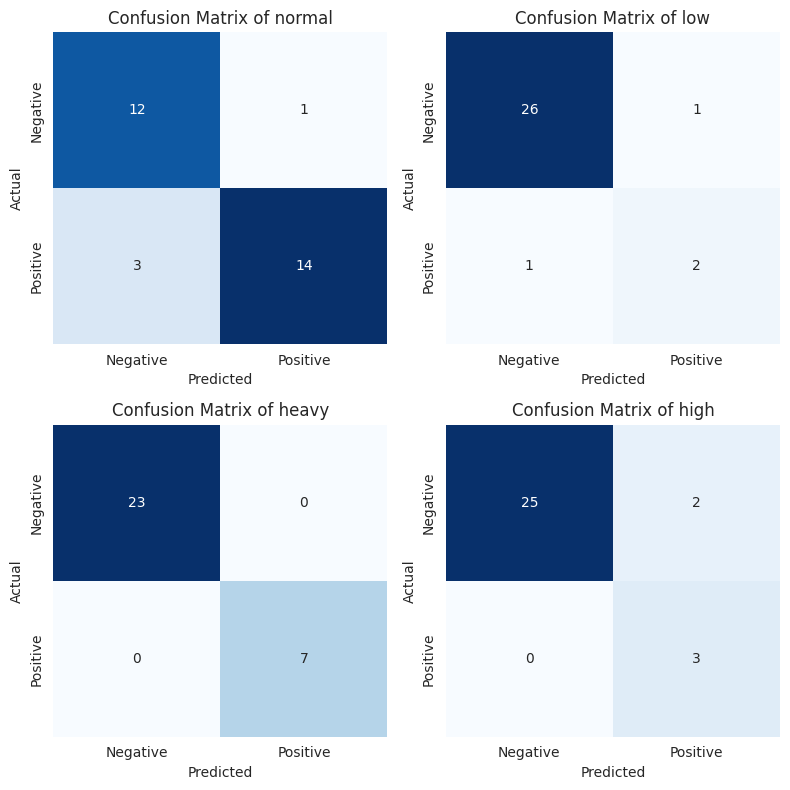

In [25]:
labels = train_data_reduced['Traffic Situation'].unique().tolist()

cm = multilabel_confusion_matrix(true_labels_reduced, predictions_reduced, labels=labels)
cm_labels = ['Negative', 'Positive']
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.ravel()

for i in range(4):
    cm_df = pd.DataFrame(cm[i], index=cm_labels, columns=cm_labels)
    sns.heatmap(cm_df, annot=True, cmap='Blues', ax=axes[i], cbar=False)
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
    title = "Confusion Matrix of " + labels[i]
    axes[i].set_title(title)
    
fig.tight_layout()
fig.show()